# Telecom Churn Dataset - Classification
## Cleaned Orange Telecom Customer Churn Dataset - Predict behavior to retain customers
The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made available here: The churn-80 and churn-20 datasets can be downloaded. Let's use the larger set (that is, churn-80) for training and cross-validation purposes. <br>

For more information about the dataset use the following Kaggle link:<br>
https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-80.csv

## Import Libraries and Load Data

In [4]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) # file path

/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv
/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv


In [18]:
# load data
df=pd.read_csv('/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv')

## EDA - Exploratory Data Analysis

In [3]:
df.head() # first 5 entries

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [5]:
df.info() # infos about the rows, columns and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
df.isnull().sum() # checking for missing values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

We have a total amount of 2666 samples, 20 features and no missing values.

In [7]:
df.describe() # statistical infos about features

Account length    Area code  Number vmail messages  Total day minutes  \
count     2666.000000  2666.000000            2666.000000         2666.00000   
mean       100.620405   437.438860               8.021755          179.48162   
std         39.563974    42.521018              13.612277           54.21035   
min          1.000000   408.000000               0.000000            0.00000   
25%         73.000000   408.000000               0.000000          143.40000   
50%        100.000000   415.000000               0.000000          179.95000   
75%        127.000000   510.000000              19.000000          215.90000   
max        243.000000   510.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000       2666.000000        2666.000000      2666.000000   
mean        100.310203         30.512404         200.386159       100.023631   
std          19.988162          9.215733          50.951515        20.161445   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.380000         165.300000        87.000000   
50%         101.000000         30.590000         200.900000       100.000000   
75%         114.000000         36.700000         235.100000       114.000000   
max         160.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       2666.000000          2666.000000        2666.000000   
mean          17.033072           201.168942         100.106152   
std            4.330864            50.780323          19.418459   
min            0.000000            43.700000          33.000000   
25%           14.050000           166.925000          87.000000   
50%           17.080000           201.150000         100.000000   
75%           19.980000           236.475000         113.000000   
max           30.910000           395.000000         166.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         2666.000000         2666.000000       2666.000000   
mean             9.052689           10.237022          4.467367   
std              2.285120            2.788349          2.456195   
min              1.970000            0.000000          0.000000   
25%              7.512500            8.500000          3.000000   
50%              9.050000           10.200000          4.000000   
75%             10.640000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        2666.000000             2666.000000  
mean            2.764490                1.562641  
std             0.752812                1.311236  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.750000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [8]:
df.corr() # the correlation between the features

Account length  Area code  Number vmail messages  \
Account length                1.000000  -0.008620              -0.002996   
Area code                    -0.008620   1.000000              -0.000584   
Number vmail messages        -0.002996  -0.000584               1.000000   
Total day minutes             0.002847  -0.023134               0.019027   
Total day calls               0.038862  -0.009629              -0.009622   
Total day charge              0.002843  -0.023130               0.019027   
Total eve minutes            -0.015923   0.000679               0.011401   
Total eve calls               0.018552  -0.018602               0.005131   
Total eve charge             -0.015909   0.000707               0.011418   
Total night minutes          -0.008994  -0.003353              -0.000224   
Total night calls            -0.024007   0.011455               0.008124   
Total night charge           -0.008999  -0.003382              -0.000229   
Total intl minutes            0.011369  -0.013418              -0.004156   
Total intl calls              0.017627  -0.027423               0.027013   
Total intl charge             0.011383  -0.013534              -0.004136   
Customer service calls        0.002455   0.034442              -0.018787   
Churn                         0.017728   0.001019              -0.086474   

                        Total day minutes  Total day calls  Total day charge  \
Account length                   0.002847         0.038862          0.002843   
Area code                       -0.023134        -0.009629         -0.023130   
Number vmail messages            0.019027        -0.009622          0.019027   
Total day minutes                1.000000         0.016780          1.000000   
Total day calls                  0.016780         1.000000          0.016787   
Total day charge                 1.000000         0.016787          1.000000   
Total eve minutes                0.003999        -0.026003          0.004008   
Total eve calls                  0.009059         0.006473          0.009056   
Total eve charge                 0.003992        -0.026006          0.004002   
Total night minutes              0.013491         0.008986          0.013495   
Total night calls                0.015054        -0.016776          0.015057   
Total night charge               0.013464         0.008972          0.013468   
Total intl minutes              -0.011042         0.031036         -0.011046   
Total intl calls                 0.005687         0.006928          0.005688   
Total intl charge               -0.010934         0.031133         -0.010938   
Customer service calls          -0.024543        -0.011945         -0.024548   
Churn                            0.195688         0.018290          0.195689   

                        Total eve minutes  Total eve calls  Total eve charge  \
Account length                  -0.015923         0.018552         -0.015909   
Area code                        0.000679        -0.018602          0.000707   
Number vmail messages            0.011401         0.005131          0.011418   
Total day minutes                0.003999         0.009059          0.003992   
Total day calls                 -0.026003         0.006473         -0.026006   
Total day charge                 0.004008         0.009056          0.004002   
Total eve minutes                1.000000        -0.007654          1.000000   
Total eve calls                 -0.007654         1.000000         -0.007642   
Total eve charge                 1.000000        -0.007642          1.000000   
Total night minutes             -0.013414        -0.000175         -0.013428   
Total night calls                0.009017         0.000797          0.009030   
Total night charge              -0.013450        -0.000135         -0.013464   
Total intl minutes              -0.006915         0.011012         -0.006923   
Total intl calls                 0.002160         0.003710          0.002169   
Total intl cha

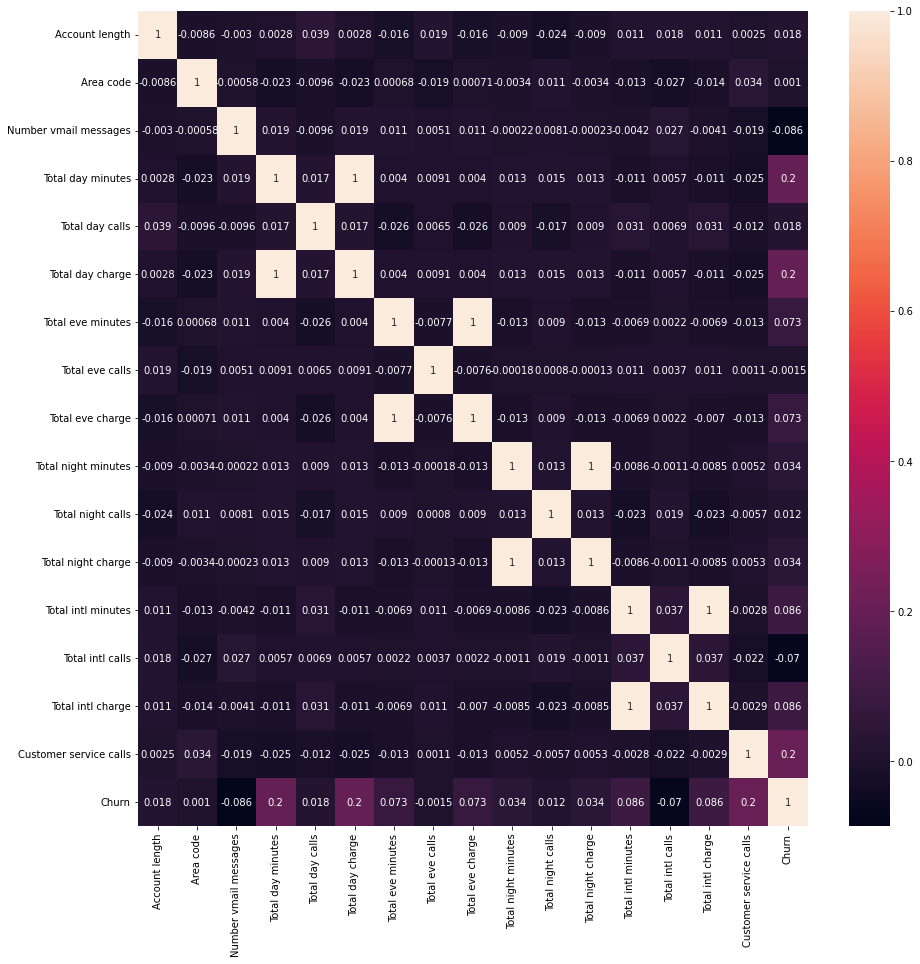

In [10]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

### Data Vizualisation and Data Processing

We show all columns in hisptlots to get more insight about the features

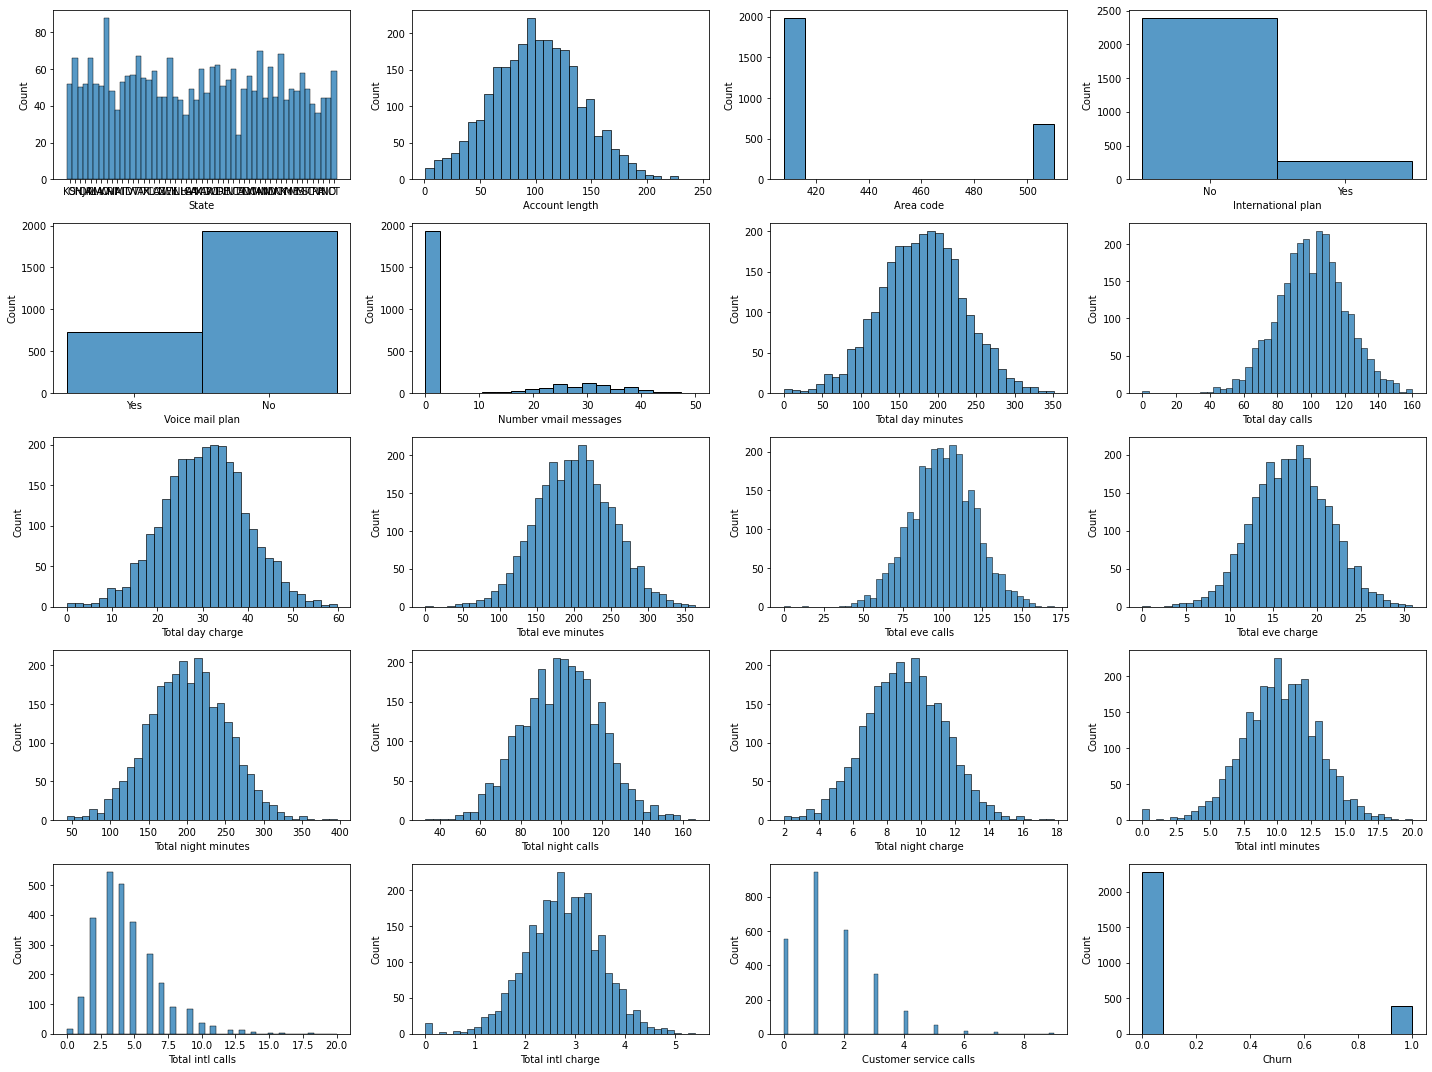

In [28]:
# Create a figure and a set of subplots with as many rows as needed and 4 columns
num_rows = (len(df.columns) + 2) // 4  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20,15))

# Create a histplot for each column in the DataFrame
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i // 4, i % 4])
plt.tight_layout()
plt.show()

In [34]:
df.State.unique() # see unique values of the States

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

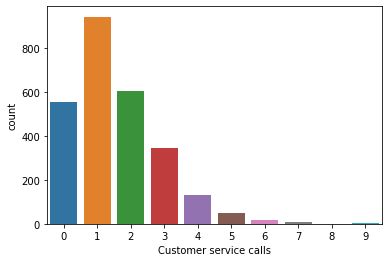

In [42]:
sns.countplot(x=df['Customer service calls']); # plot customer service calls

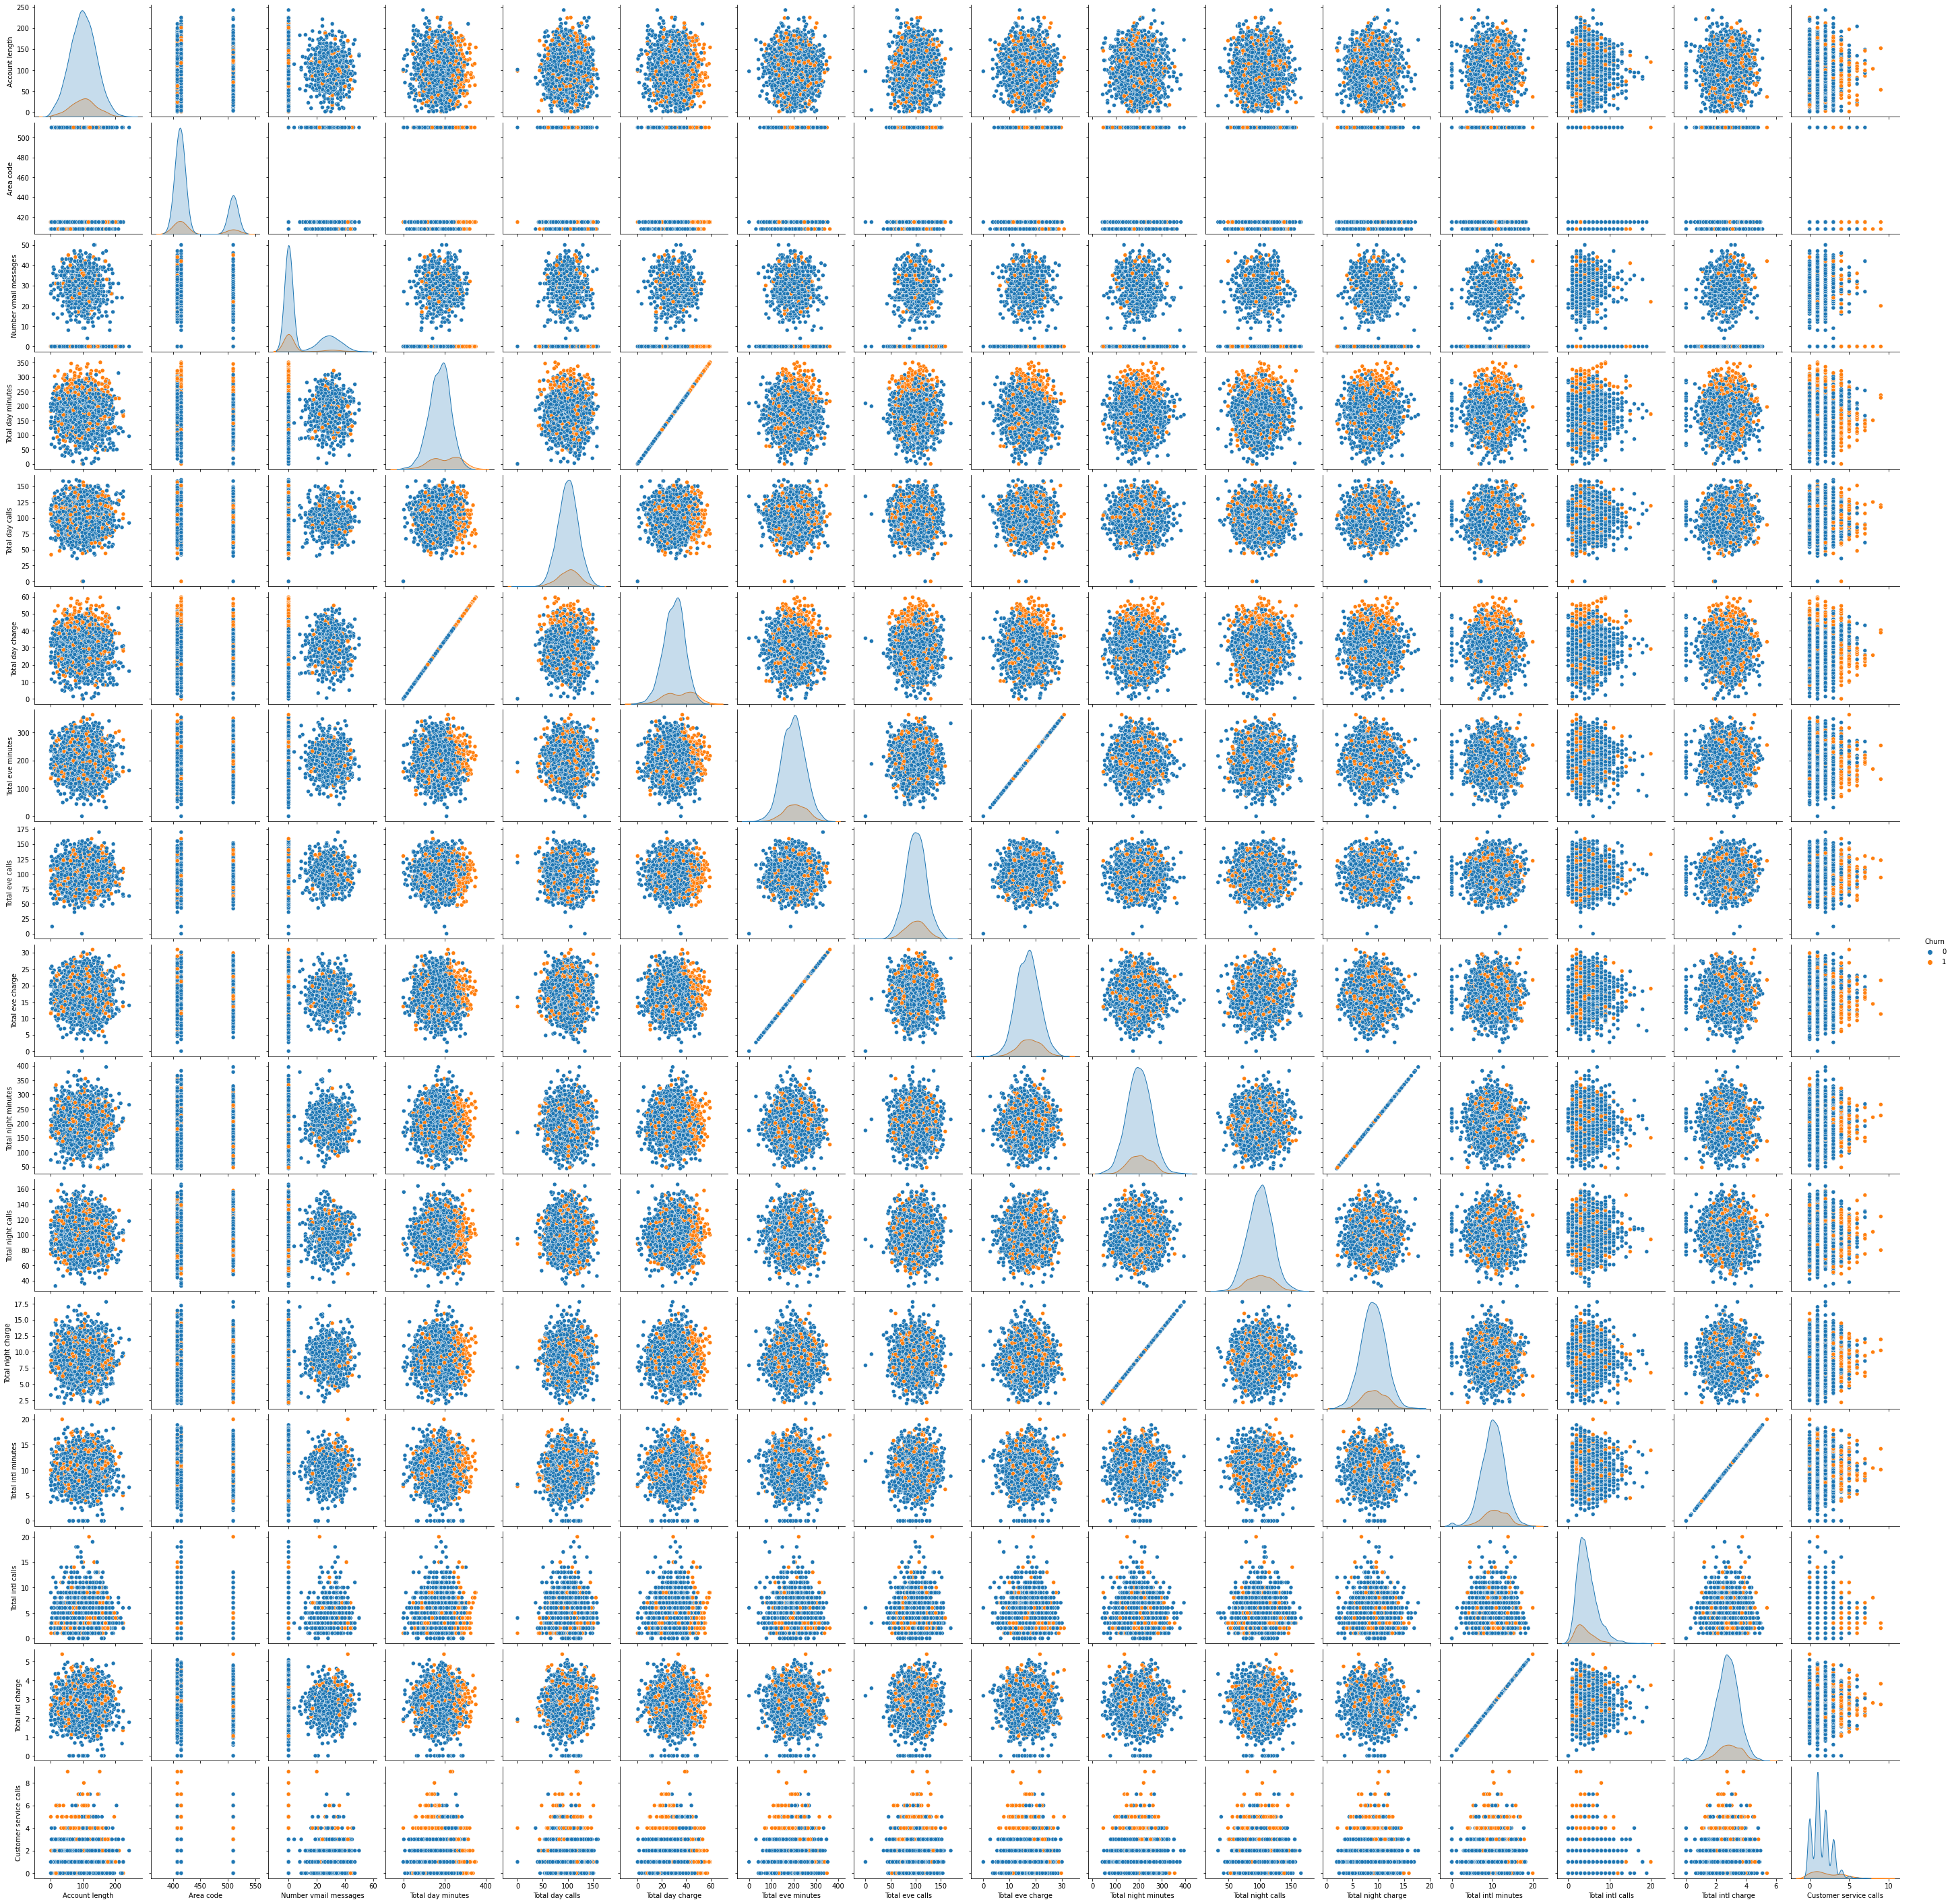

In [43]:
sns.pairplot(df,hue="Churn");

### Feature Engineering
We replace the True and False values in the churn column with 1(=True) and 0(=False) to have them as int types for building our model

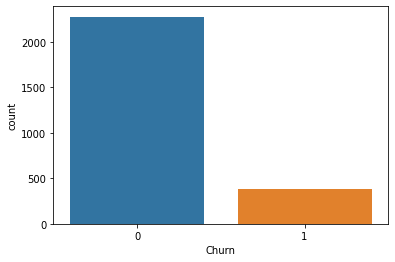

In [22]:
df.Churn=df.Churn.map({False:0,True:1})
sns.countplot(x=df.Churn);

We can see that our Data is imbalanced. We will use _SMOTE_ for oversampling while building our model to deal with this imbalanced data.

In [44]:
# same mapping with international- and voice mail plans
df['International plan']=df['International plan'].map({"No":0,"Yes":1})
df['Voice mail plan']=df['Voice mail plan'].map({"No":0,"Yes":1})

## Modeling

In [55]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y, get dummies (sparse matrix - object to integer)
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    x=pd.get_dummies(x,drop_first=True)
    # Using SMOTE for oversampling imbalanced data
    sm = SMOTE(random_state=42)
    x, y = sm.fit_resample(x, y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [56]:
classification_funct(df,"Churn")  # call classification function and see results in a Dataframe

f1_score  recall_score  precision_score  \
XGBClassifier           0.956311      0.947115         0.965686   
RandomForestClassifier  0.946237      0.951923         0.940618   
GaussianNB              0.874372      0.836538         0.915789   
DecisionTreeClassifier  0.869565      0.913462         0.829694   
BernoulliNB             0.841596      0.836538         0.846715   
KNeighborsClassifier    0.826531      0.973558         0.718085   
SVC                     0.585507      0.485577         0.737226   
LogisticRegression      0.663755      0.730769         0.608000   

                        accuracy_score  
XGBClassifier                 0.960526  
RandomForestClassifier        0.950658  
GaussianNB                    0.890351  
DecisionTreeClassifier        0.875000  
BernoulliNB                   0.856360  
KNeighborsClassifier          0.813596  
SVC                           0.686404  
LogisticRegression            0.662281

The best result scored the **XGBClassifier** with **f1: 96%, recall: 95%, precision: 97% and accuracy score: 96%.** followed by the RandomForestClassifier. Before oversampling our data using SMOTE, the accuracy score was 97% but we had low f1 scores.

## Using Deep Learning

In [65]:
# import Deep Learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
# Build the model
model=Sequential()
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # sigmoid for classification

In [67]:
#compile model
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [68]:
# assign x and y and get dummies (sparse matrix - object to integer)
x,y=df.drop("Churn",axis=1),df[["Churn"]]    
x=pd.get_dummies(x,drop_first=True)

In [69]:
model.fit(x,y,epochs=100,batch_size=50,verbose=1) # fit model

Epoch 1/100
54/54 [==============================] - 1s 9ms/step - loss: 3.5929 - accuracy: 0.8061
Epoch 2/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4009 - accuracy: 0.8638
Epoch 3/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4125 - accuracy: 0.8623
Epoch 4/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3999 - accuracy: 0.8725
Epoch 5/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3897 - accuracy: 0.8695
Epoch 6/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3623 - accuracy: 0.8773
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3740 - accuracy: 0.8773
Epoch 8/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3507 - accuracy: 0.8811
Epoch 9/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3484 - accuracy: 0.8848
Epoch 10/100
54/54 [==============================] - 0s 8ms/step - loss: 0.3660 - accuracy: 0.8830
Epoch 11/

In [70]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               35328     
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 823,809
Trainable params: 823,809
Non-trainable params: 0
_________________________________________________________________


In [71]:
scores=model.evaluate(x,y)

84/84 [==============================] - 0s 3ms/step - loss: 0.1769 - accuracy: 0.9374


In [72]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 93.74%


We have an **Accuracy of 93,74%** using deep learning with 100 epochs, slighlty less than our model above.